In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [87]:
url="Inventario.csv"
inventario=pd.read_csv(url)

In [88]:
inventario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SKU_ID                        1000 non-null   object 
 1   SKU_Name                      1000 non-null   object 
 2   Category                      1000 non-null   object 
 3   ABC_Class                     1000 non-null   object 
 4   Supplier_ID                   1000 non-null   object 
 5   Supplier_Name                 1000 non-null   object 
 6   Warehouse_ID                  1000 non-null   object 
 7   Warehouse_Location            1000 non-null   object 
 8   Batch_ID                      1000 non-null   object 
 9   Received_Date                 1000 non-null   object 
 10  Last_Purchase_Date            1000 non-null   object 
 11  Expiry_Date                   1000 non-null   object 
 12  Stock_Age_Days                1000 non-null   int64  
 13  Quan

In [89]:
inventario.head()

,SKU_ID,SKU_Name,Category,ABC_Class,Supplier_ID,Supplier_Name,Warehouse_ID,Warehouse_Location,Batch_ID,Received_Date,...,SKU_Churn_Rate,Order_Frequency_per_month,Supplier_OnTime_Pct,FIFO_FEFO,Inventory_Status,Count_Variance,Audit_Date,Audit_Variance_Pct,Demand_Forecast_Accuracy_Pct,Notes
0,SKU0001,Pantry Product 13,Pantry,A,S005,PT Agro Raya,WHBDG,Bandung - Rancaekek,BATCH2679,2025-07-14,...,"2,39","5,00","70,68%",FIFO,In Stock,0,2025-06-26,"-7,14%","95,67%",NaN
1,SKU0002,Fresh Product 112,Fresh Produce,C,S004,PT Nusantara Supplier,WHDPS,Denpasar - Tabanan,BATCH4257,2025-04-08,...,"3,34","12,00","84,61%",FEFO,Low Stock,4,2025-08-12,"2,15%","86,00%",NaN
2,SKU0003,Meat Product 446,Meat,B,S001,PT Segar Makmur,WHBDG,Bandung - Rancaekek,BATCH6574,2025-03-15,...,"2,26","11,00","85,36%",FIFO,Expiring Soon,-5,2025-08-13,"6,85%","87,64%",NaN
3,SKU0004,Seafood Product 48,Seafood,A,S007,PT Bakerindo,WHJKT,Jakarta - Cengkareng,BATCH5333,2025-06-10,...,"2,72","10,00","72,81%",FIFO,Expiring Soon,0,2025-07-13,"-6,69%","71,15%",NaN
4,SKU0005,Personal Product 194,Personal Care,A,S002,PT Indo Fresh,WHDPS,Denpasar - Tabanan,BATCH6925,2025-06-26,...,"2,18","2,00","70,93%",FIFO,In Stock,-5,2025-06-11,"1,23%","76,25%",High return rate


In [90]:
#Eliminar: Batch_ID,Last_Purchase_Price,SKU_Churn_Rate,Supplier_OnTime,FIFO_FEFO,Count_Variance,Audit_Date,Notes,Demand_Forecast_Accuracy_Pct,Last_Purchase_Date,Expiry_Date
#Rename: ProductName a SKU_Name

In [91]:
inventario.drop(columns=["Batch_ID","SKU_Churn_Rate","FIFO_FEFO","Count_Variance","Audit_Date","Notes","Demand_Forecast_Accuracy_Pct","Last_Purchase_Date","Expiry_Date"],inplace=True)
inventario.drop(columns=["SKU_ID","Supplier_ID","Warehouse_ID","Last_Purchase_Price_USD","Received_Date","Supplier_OnTime_Pct"],inplace=True)
inventario.rename(columns={"SKU_Name":"Product_Name"},inplace=True)

In [92]:
inventario.head()

,Product_Name,Category,ABC_Class,Supplier_Name,Warehouse_Location,Stock_Age_Days,Quantity_On_Hand,Quantity_Reserved,Quantity_Committed,Damaged_Qty,...,Forecast_Next_30d,Days_of_Inventory,Reorder_Point,Safety_Stock,Lead_Time_Days,Unit_Cost_USD,Total_Inventory_Value_USD,Order_Frequency_per_month,Inventory_Status,Audit_Variance_Pct
0,Pantry Product 13,Pantry,A,PT Agro Raya,Bandung - Rancaekek,57,359,100,36,0,...,971.000,"12,57",51.0,22,1,"$5,81","$2.084,25","5,00",In Stock,"-7,14%"
1,Fresh Product 112,Fresh Produce,C,PT Nusantara Supplier,Denpasar - Tabanan,154,314,64,0,0,...,796.000,"8,97",744.0,254,14,"$1,45","$456,71","12,00",Low Stock,"2,15%"
2,Meat Product 446,Meat,B,PT Segar Makmur,Bandung - Rancaekek,178,485,28,62,3,...,1.377,"13,27",225.0,79,4,"$1,86","$902,63","11,00",Expiring Soon,"6,85%"
3,Seafood Product 48,Seafood,A,PT Bakerindo,Jakarta - Cengkareng,91,281,92,49,0,...,716.000,"11,02",162.0,60,4,"$14,50","$4.073,15","10,00",Expiring Soon,"-6,69%"
4,Personal Product 194,Personal Care,A,PT Indo Fresh,Denpasar - Tabanan,75,235,63,33,0,...,518.000,"13,78",80.0,29,3,"$9,46","$2.222,91","2,00",In Stock,"1,23%"


In [ ]:
inventario.duplicated().sum()
#inventario.loc[inventario["Product_Name"].duplicated()] Mirar duplicados en columna especifica

np.int64(0)

In [ ]:
inventario.isnull().sum()
#inventario.loc[inventario["Product_Name"].isnull()] Mirar nulos en columna especifica
#inventario["Product_Name"].fillna("Unknown", inplace=True) Llenar nulos con valor específico
#inventario.dropna(subset=["Product_Name"], inplace=True) Eliminar filas con nulos en columna específica

Product_Name                 0
Category                     0
ABC_Class                    0
Supplier_Name                0
Warehouse_Location           0
Stock_Age_Days               0
Quantity_On_Hand             0
Quantity_Reserved            0
Quantity_Committed           0
Damaged_Qty                  0
Returns_Qty                  0
Avg_Daily_Sales              0
Forecast_Next_30d            0
Days_of_Inventory            0
Reorder_Point                0
Safety_Stock                 0
Lead_Time_Days               0
Unit_Cost_USD                0
Total_Inventory_Value_USD    0
Order_Frequency_per_month    0
Inventory_Status             0
Audit_Variance_Pct           0
dtype: int64

(np.float64(-0.5), np.float64(611.5), np.float64(407.5), np.float64(-0.5))

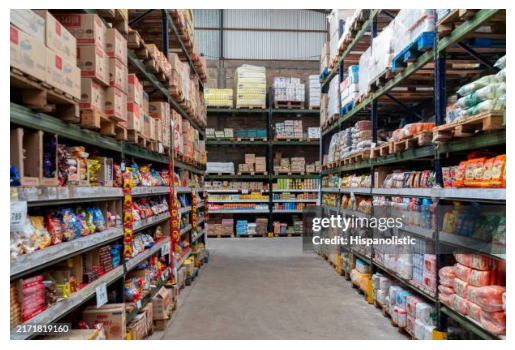

In [94]:
imagen="Bodega.jpg"
imagen1=plt.imread(imagen)
plt.imshow(imagen1)
plt.axis("off")